In [96]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [97]:
import os
import pandas as pd
import numpy as np

In [98]:
os.chdir("C:/Users/utsav/Desktop/Ayushi/Python/Project files")

In [99]:
data = pd.read_csv("cardio_train.csv", sep=';')

In [100]:
data.head()
#age is in days

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [101]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [102]:
# Verify whether any null values present in the dataset
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [103]:
# Check datatype
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [104]:
#Descriptive Statistics on dataset
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
from matplotlib import rcParams


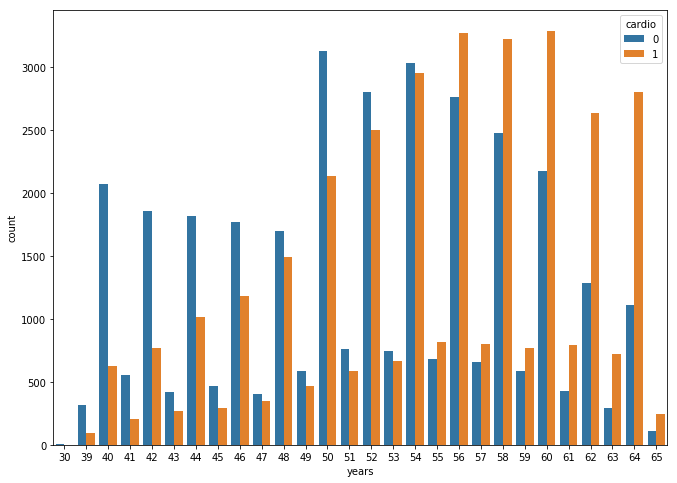

In [106]:
#Age is measured in days, height is in centimeters. 
#Let's look ate the numerical variables and how are they spread among target class. 
#For example, at what age does the number of people with CVD exceed the number of people without CVD?
rcParams['figure.figsize'] = 11, 8
data['years'] = (data['age']/365).round().astype('int')
import seaborn as sns
sns.countplot(x = 'years', hue = 'cardio', data = data)

# we can see that from age of 55, the chances of having cvd increases.

C:\Users\utsav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


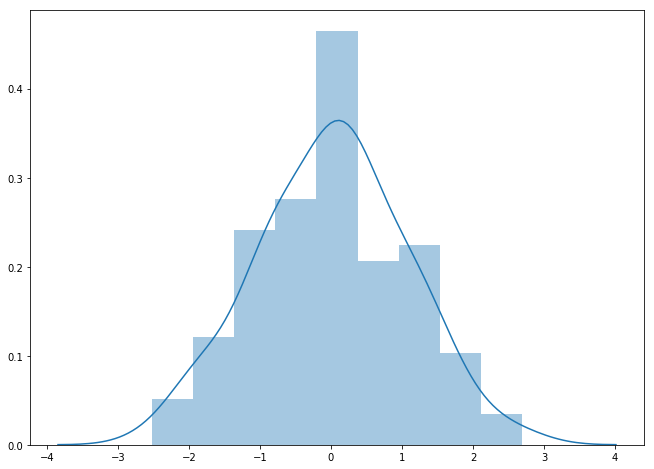

In [108]:
## If we plot simple distplot of random numbers, we'll get normal distribution
x = np.random.randn(100)
norm_dist = sns.distplot(x)

C:\Users\utsav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


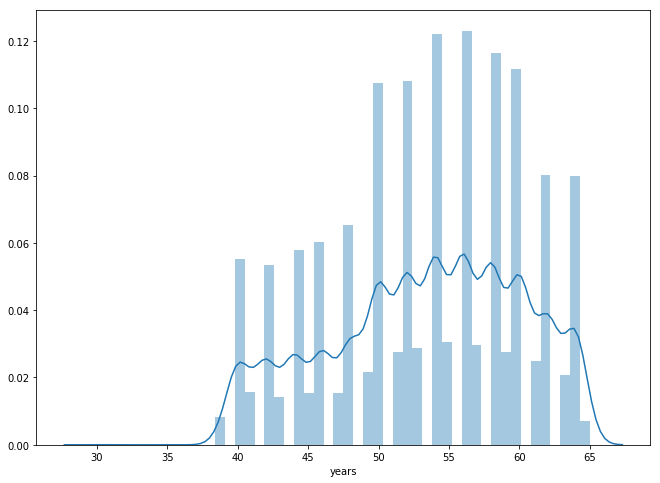

In [109]:
sns.distplot(data['years'] )

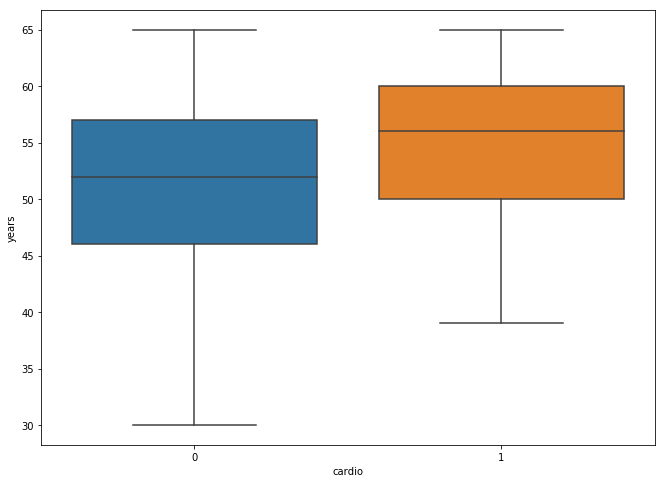

In [110]:
sns.boxplot(x = 'cardio', y = 'years', data = data)
## We can see that people with cardio disease are older than people with no cardio disease

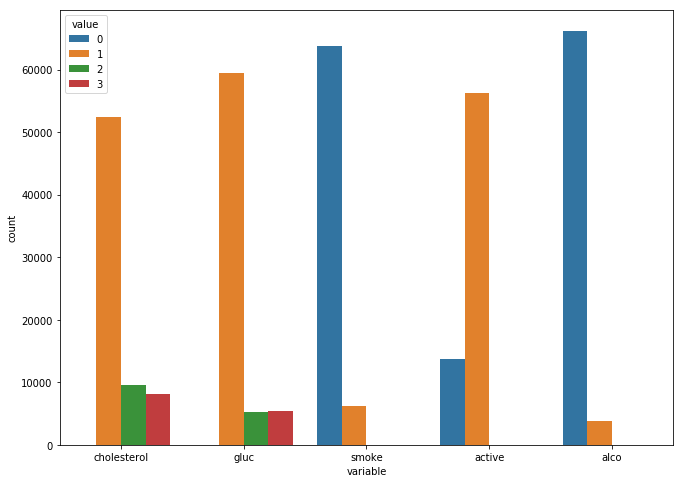

In [111]:
#Let's look at categorical variables in the dataset and their distribution:
data_categorical = data.loc[:,['cholesterol','gluc','smoke','active','alco']]
sns.countplot(x="variable", hue="value",data= pd.melt(data_categorical));

In [112]:
pd.melt(data_categorical)

,variable,value
0,cholesterol,1
1,cholesterol,3
2,cholesterol,3
3,cholesterol,1
4,cholesterol,1
5,cholesterol,2
6,cholesterol,3
7,cholesterol,3
8,cholesterol,1
9,cholesterol,1


In [113]:
#Bivariate analysis
#It may be useful to split categorical variables by target class
data_long = pd.melt(data, id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','active','alco'])

In [114]:
data_long

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,3
2,1,cholesterol,3
3,1,cholesterol,1
4,0,cholesterol,1
5,0,cholesterol,2
6,0,cholesterol,3
7,1,cholesterol,3
8,0,cholesterol,1
9,0,cholesterol,1


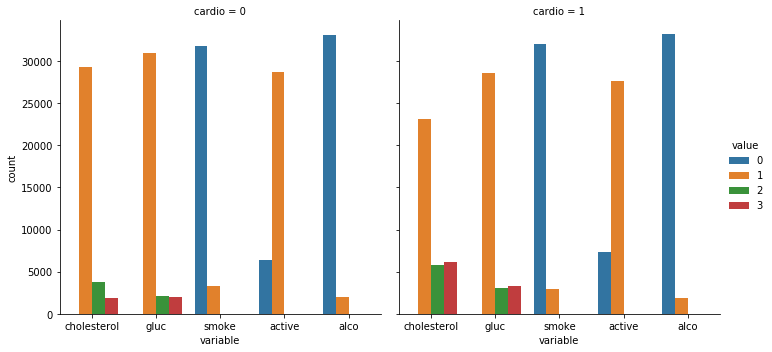

In [115]:
import seaborn as sns
sns.catplot(x = 'variable', hue = 'value', col = 'cardio', data= data_long, kind='count')
# You can see that people with CVD have higher glucose and cholesterol level(2,3), but smoke, activeness and alcohol level doesn't show us much difference.

In [116]:
## In our data, the gender column has 1 and 2 values but we don't know which value represents male and female.
## So we'll calculate average height for both. And we'll assume that males are taller than females.

data['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

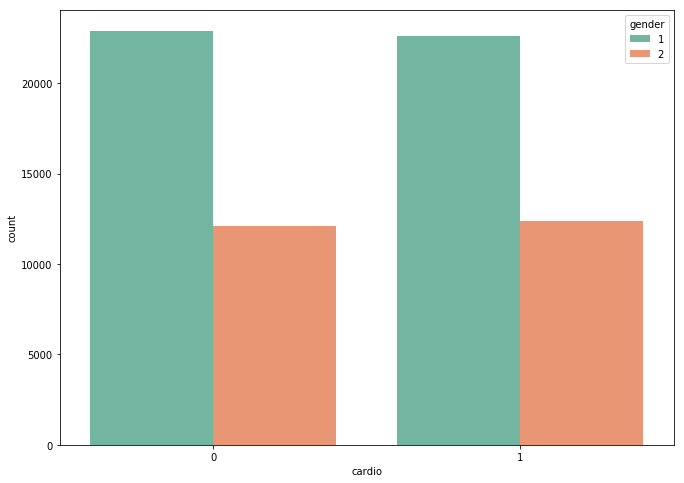

In [117]:
sns.countplot(x = 'cardio', hue = 'gender', data = data, palette='Set2')
## gender vs cardio.. you can see the number of males and females for each value of cardio

In [118]:
data['weight'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

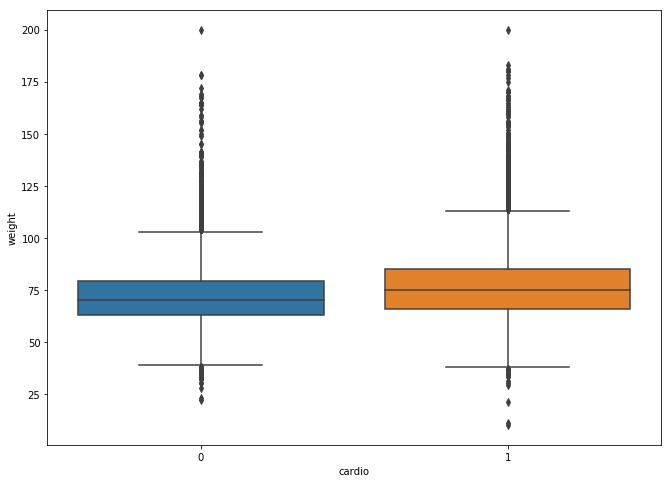

In [119]:
sns.boxplot(x = 'cardio', y = 'weight', data = data)

In [120]:
data.groupby('gender')['height'].mean()
# so males are 2 and females are 1

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [121]:
## Lets see who consumes more alcohol

data.groupby('gender')['alco'].sum()

## We can see that men consume more alcohol than females

gender
1    1161
2    2603
Name: alco, dtype: int64

In [122]:
## Let's see if the target variables is balanced or not.

data['cardio'].value_counts(normalize = True)

## Balanced data set because both values 1 and 0 are equally distributed in the dataset.

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [123]:
## Pandas Crosstab function to see if the dataset is balanced or not
pd.crosstab(data['gender'],data['cardio'])  ## use normalize to see the percentage of values


cardio,0,1
gender,,
1,22914,22616
2,12107,12363


In [124]:
## Checking for correlations of all attibutes with the target variable

data.corr()['cardio'].drop('cardio')

id             0.003799
age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
years          0.237749
Name: cardio, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2A362FEB8>,
      dtype=object)

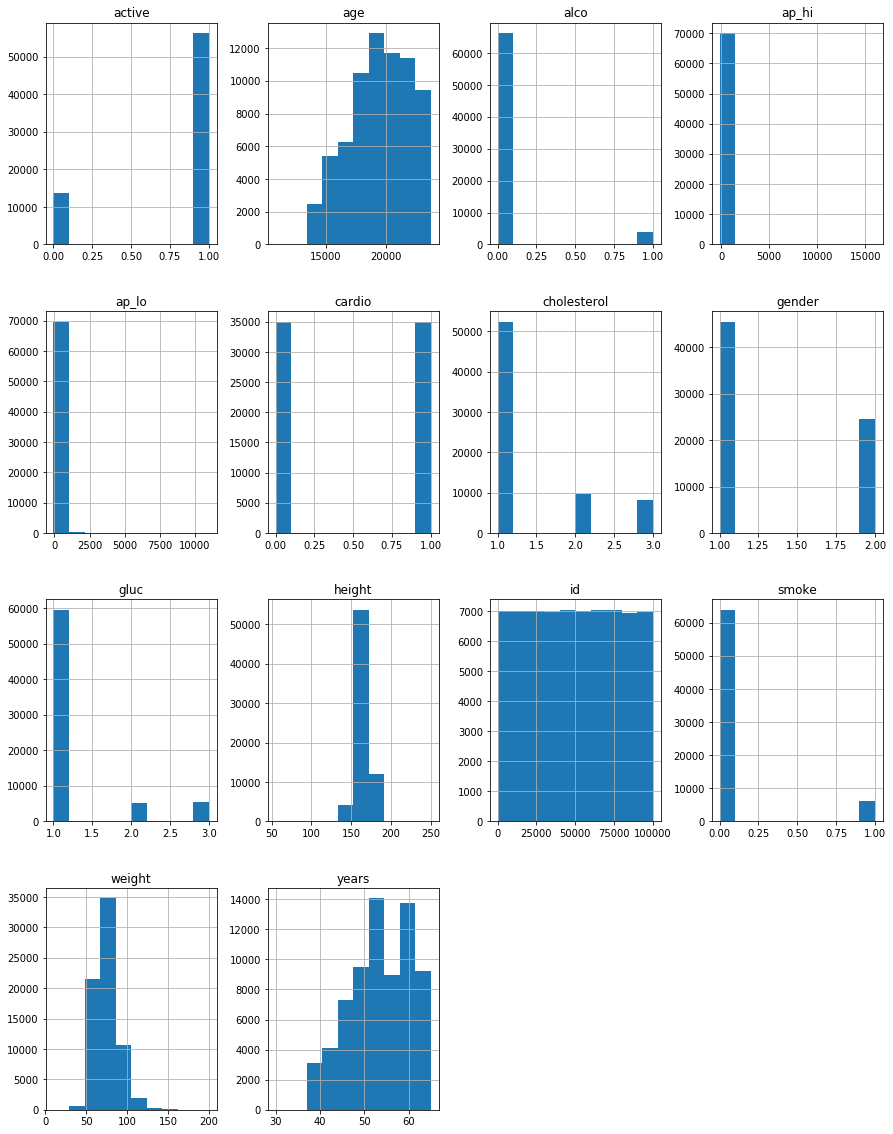

In [125]:
data.hist(figsize=(15,20))

In [130]:
## Renaming columns
data.columns = ['id','age','gender', 'height', 'weight', 'Systolic_BP', 'Diastolic_BP',
      'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio', 'years']
#data.columns = ['id','gender', 'height', 'weight', 'ap_hi', 'ap_lo',
      # 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'years']

In [131]:
data.head()

,id,age,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


In [10]:
## Outliers check using BoxPlot

In [134]:
import matplotlib.pyplot as plt
columns = [ 'gender', 'height', 'weight', 'Systolic_BP', 'Diastolic_BP',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio', 'years']
for i in range(len(columns)):
    def check_outliers(i):
        fig,axes=plt.subplots(1,1)
        sns.boxplot(data=data,x=i, color='Green')
        fig.set_size_inches(15,5)

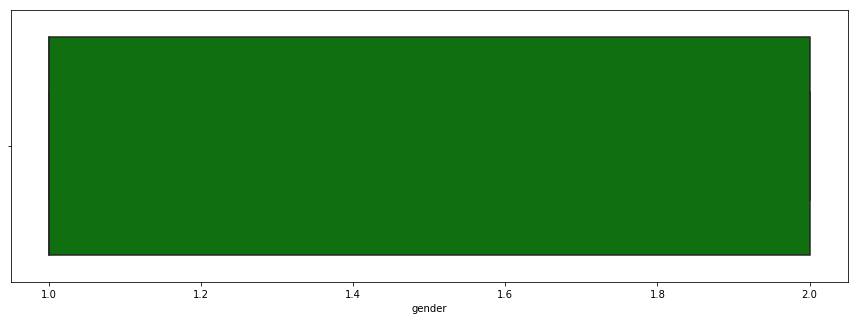

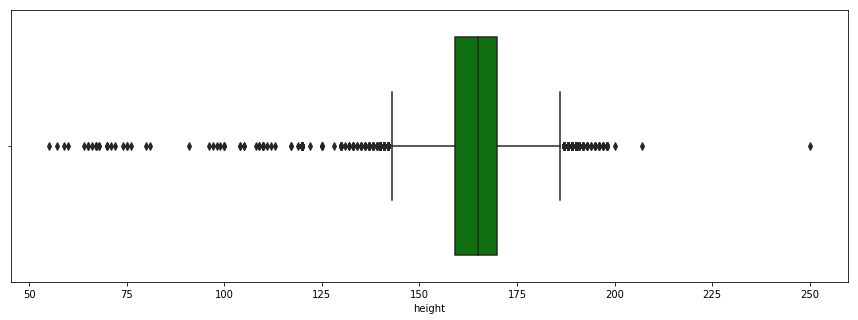

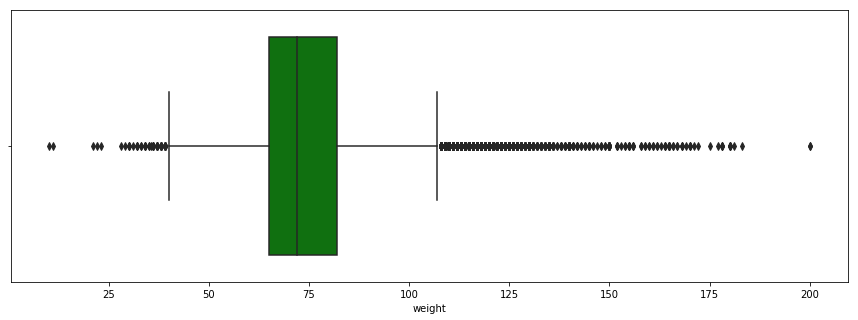

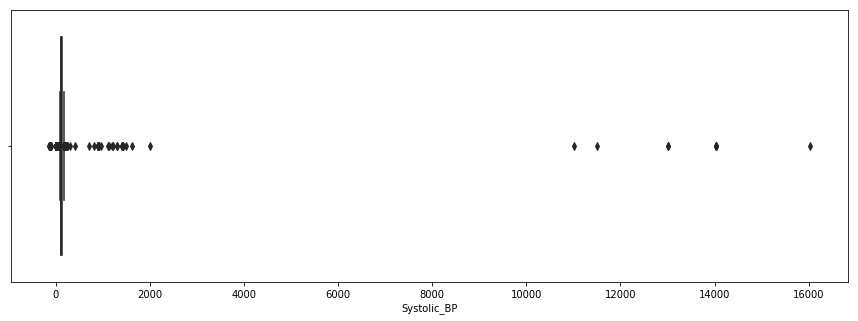

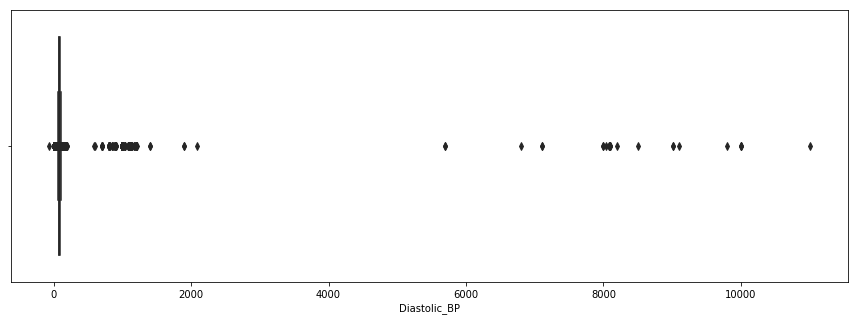

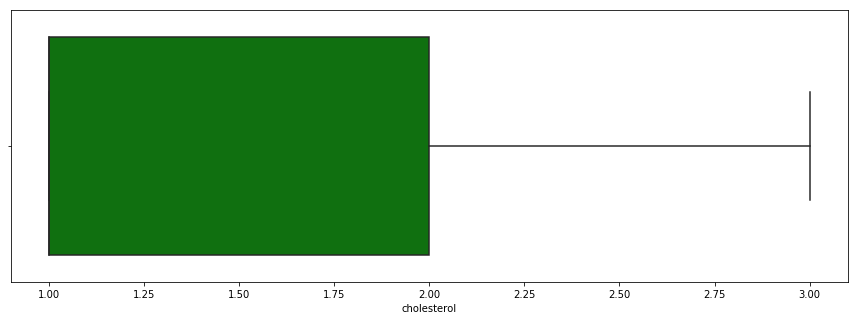

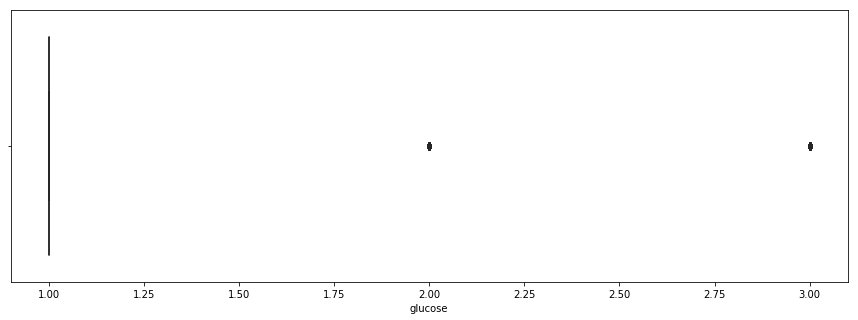

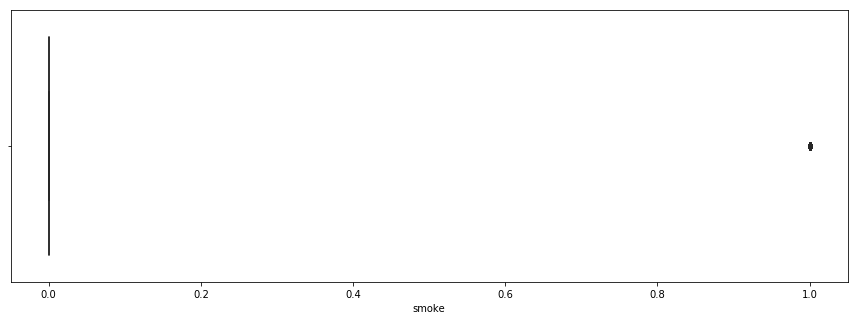

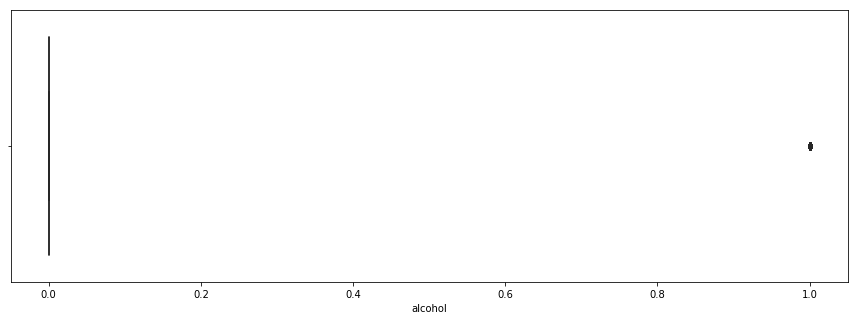

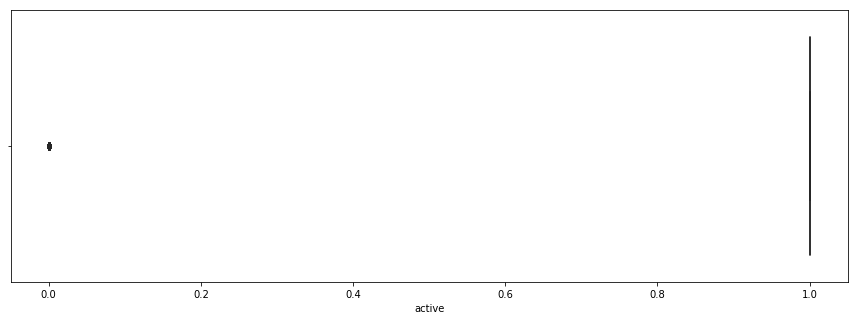

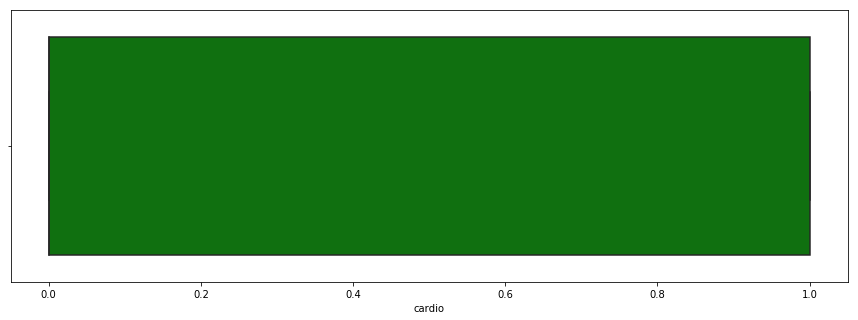

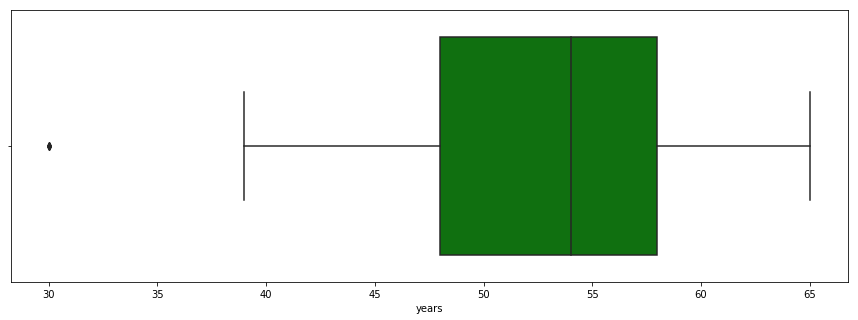

In [135]:
for i in range(len(columns)):
    check_outliers(columns[i])
    
# We can see that height, weight, Systolic BP, Diastolic BP have outliers. Lets remove them.
# Also, year has one outlier.
# Also, we can see that, there are negative values of Systolic and Dialostic BP which doesn't make any sense. 
# And, for some records, Systolic BP is less than Dialostic BP which is inappropriate. So we'll get rid of them too.

In [136]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,0:11]
y = data.iloc[:,12]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
logreg = LogisticRegression().fit(X_train,y_train)



# print the coefficients and model performance
print("Logistic Intercept:", logreg.intercept_)
print("training Score:{:.3f}".format(logreg.score(X_train, y_train)) )
print("testing Score:{:.3f}".format(logreg.score(X_test, y_test)) )

Logistic Intercept: [-1.0551043]
training Score:0.711
testing Score:0.707


In [ ]:
## Lets see results after we remove outliers

In [139]:
## Lets remove the outliers form the mentioned columns: height,weight,systolic BP, Diastolic BP
print(data.height.describe())
data[data['height'] > 200]

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64


,id,age,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio,years
6486,9223,21220,1,250,86.0,140,100,3,1,0,0,1,1,58
21628,30894,19054,2,207,78.0,100,70,1,1,0,1,1,0,52


In [140]:
del data['age']

In [141]:
ntive_BP_rows = data[data['Systolic_BP']<0]## we'll delete these records cuz BP can't be negative
ntive_BP_rows

,id,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio,years
4607,6525,1,165,78.0,-100,80,2,1,0,0,1,0,42
16021,22881,2,161,90.0,-115,70,1,1,0,0,1,0,61
20536,29313,1,153,54.0,-100,70,1,1,0,0,1,0,43
23988,34295,1,162,74.0,-140,90,1,1,0,0,1,1,50
25240,36025,2,168,50.0,-120,80,2,1,0,0,0,1,40
35040,50055,2,168,59.0,-150,80,1,1,0,0,1,1,64
46627,66571,2,160,59.0,-120,80,1,1,0,0,0,0,65


In [142]:
neg_dias_bp = data[data['Diastolic_BP']<0] # we'll delete this record because BP can't be negative
neg_dias_bp

,id,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio,years
60106,85816,1,167,74.0,15,-70,1,1,0,0,1,1,62


In [143]:
data = data[~(data['Systolic_BP']<0)]

In [144]:
data = data[~(data['Diastolic_BP']<0)]

In [145]:
data[data.Systolic_BP < 0] ## no more negative values of Systolic BP

,id,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio,years


In [146]:
data[data.Diastolic_BP<0] # no more negative values of Diastolic BP

,id,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio,years


In [147]:
data.shape

(69992, 13)

In [148]:
## Lets remove height and weight values which are outliers

columns = ['height','weight']
for i in range(len(columns)):
    data.drop(data[(data[columns[i]] > data[columns[i]].quantile(0.975)) | (data[columns[i]] < data[columns[i]].quantile(0.025))].index,inplace=True)

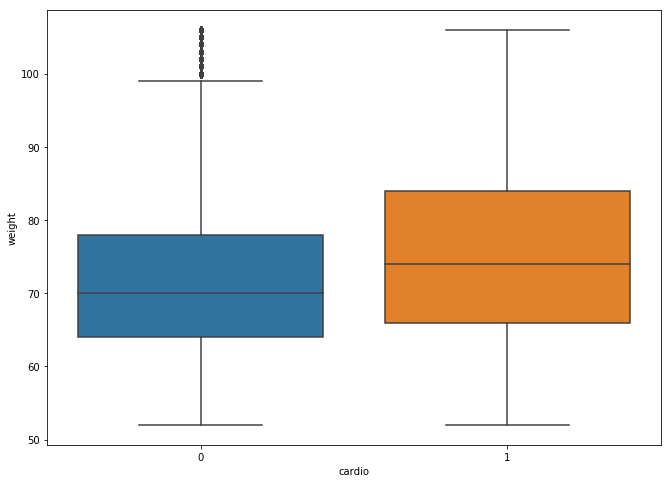

In [149]:
# Lets plot height and weight box plot again to check outliers

import seaborn as sns
sns.boxplot(x = 'cardio', y = 'weight', data = data)

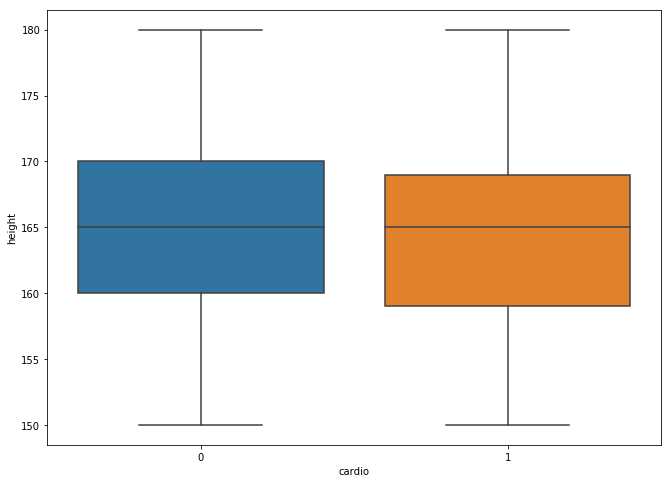

In [150]:
sns.boxplot(x = 'cardio', y = 'height', data = data)

In [151]:
data.head()

,id,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio,years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,1,156,56.0,100,60,1,1,0,0,0,0,48


In [152]:
## Rearranging the columns to avoid wrong splitting
data = data[['years','gender', 'height', 'weight', 'Systolic_BP', 'Diastolic_BP',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio']]

data.head()

,years,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [153]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,0:10]
y = data.iloc[:,11]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [154]:
X.head()

,years,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol
0,50,2,168,62.0,110,80,1,1,0,0
1,55,1,156,85.0,140,90,3,1,0,0
2,52,1,165,64.0,130,70,3,1,0,0
3,48,2,169,82.0,150,100,1,1,0,0
4,48,1,156,56.0,100,60,1,1,0,0


In [155]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [156]:
## Now that we have cleaned our data little bit, lets check for accuracy again.



logreg = LogisticRegression().fit(X_train,y_train)



# print the coefficients and model performance
print("Logistic Intercept:", logreg.intercept_)
print("training Score:{:.3f}".format(logreg.score(X_train, y_train)) )
print("testing Score:{:.3f}".format(logreg.score(X_test, y_test)) )

Logistic Intercept: [-7.55888965]
training Score:0.717
testing Score:0.712


In [157]:
# Lets try using Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Accuracy on training set: 0.729
Accuracy on test set: 0.724


In [158]:
# Lets try using Random Forest Algorithm

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

C:\Users\utsav\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

0.7213279047917319


In [175]:
## AdaBoost Algorithm

from sklearn.ensemble import AdaBoostClassifier

ada_clf_DT = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf_DT.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [160]:
y_pred = ada_clf_DT.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7203883495145631


In [161]:
## Lets do feature engineering- adding a new column BMI= mass(kg)/height^2(meters)

data['BMI'] = data['weight']/(data['height']/100)**2

In [162]:
data.head()

,years,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [163]:
#Rearranging columns again

data = data[['years','gender', 'height', 'weight', 'BMI','Systolic_BP', 'Diastolic_BP',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio']]

In [164]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,0:10]
y = data.iloc[:,11]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [165]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train,y_train)



# print the coefficients and model performance
print("Logistic Intercept:", logreg.intercept_)
print("training Score:{:.3f}".format(logreg.score(X_train, y_train)) )
print("testing Score:{:.3f}".format(logreg.score(X_test, y_test)) )

Logistic Intercept: [0.01246441]
training Score:0.804
testing Score:0.803


In [166]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

0.8025054807391169


In [167]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Accuracy on training set: 0.804
Accuracy on test set: 0.802


In [168]:
data.head()

,years,gender,height,weight,BMI,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio
0,50,2,168,62.0,21.967120,110,80,1,1,0,0,1,0
1,55,1,156,85.0,34.927679,140,90,3,1,0,0,1,1
2,52,1,165,64.0,23.507805,130,70,3,1,0,0,0,1
3,48,2,169,82.0,28.710479,150,100,1,1,0,0,1,1
4,48,1,156,56.0,23.011177,100,60,1,1,0,0,0,0


In [169]:
## New column Obesity.. 
data['Obesity'] = 0

In [170]:
data['Obesity'] = np.where(data['cholesterol']>2, 1, 0)
        

In [171]:
data.head()


,years,gender,height,weight,BMI,Systolic_BP,Diastolic_BP,cholesterol,glucose,smoke,alcohol,active,cardio,Obesity
0,50,2,168,62.0,21.967120,110,80,1,1,0,0,1,0,0
1,55,1,156,85.0,34.927679,140,90,3,1,0,0,1,1,1
2,52,1,165,64.0,23.507805,130,70,3,1,0,0,0,1,1
3,48,2,169,82.0,28.710479,150,100,1,1,0,0,1,1,0
4,48,1,156,56.0,23.011177,100,60,1,1,0,0,0,0,0


In [172]:
## Rearranging columns

data = data[['years','gender', 'height', 'weight', 'BMI','Systolic_BP', 'Diastolic_BP',
       'cholesterol', 'glucose', 'Obesity','smoke', 'alcohol', 'active', 'cardio']]

In [173]:
logreg = LogisticRegression().fit(X_train,y_train)



# print the coefficients and model performance
print("Logistic Intercept:", logreg.intercept_)
print("training Score:{:.3f}".format(logreg.score(X_train, y_train)) )
print("testing Score:{:.3f}".format(logreg.score(X_test, y_test)) )

Logistic Intercept: [0.01246441]
training Score:0.804
testing Score:0.803
